## PREDICTION MODEL ON SYRIA TEL CUSTOMERS CHURN

## OVERVIEW

Syria Tel, a telecommunications company has commissioned an anlysis to  better understand the customers' preferences and predict whether a customer will stop doing business with the company or not. The aim of the project is to leverage historical customer data to identify key factors influencing customer behavior with a focus on predicting customer churn.
Churn refers to when customers stop or discontinue their relationship with a business or a service and for this case telecommunication services.

## DATA UNDERSTANDING
This dataset has been derrived from [Churn in Telecoms Dataset on Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) containing detailed information on customer usage, service preferences and interaction history. 
The dataset enables a comprehensive analysis of factors that may influence customer satisfaction, preferences and the likelihood of churn offering SyriaTel detailed recommendations to improve service offerings and mainatain their customer base. 

## OBJECTIVE
Build a classification model to predict whether a customer will churn or not churn providing insights to the company to reduce disatisfaction among customers and maintain their customer base.

## DATA PREPARATION AND PRESENTATION

#### IMPORTING RELEVANT LIBRARIES
Pandas - Enable manipulation of imported datasets saved as dataframes.

Numpy - Enable computation of mathematical functions as well as perform array operations.

Seaborn- Enable visualization of the data.

Matplotlib.pyplot - Additional library to help in data visualization.

sklearn.linearmodel_selection - Enables splitting the dataset into training and testing sets, cross-validation and hyperparameter tuning.

sklearn.preprocessing - Contains preprocessing functions suitabe for machine learning operations 

sklearn.tree - Enables building decision tree models for classification.

sklearn.metrics - Enables evaluation of model performance based on various metrics

In [61]:
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

#### LOAD AND REVIEW THE DATASET

Once the libraries have been imported, load and review the dataset.

In [3]:
#load and view the first 5 rows
df_syria = pd.read_csv('SyriaTel/bigml_59c28831336c6604c800002a.csv')
df_syria.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# check for duplicates in the df_syria dataframe
df_syria.duplicated().value_counts()

False    3333
Name: count, dtype: int64

In [5]:
# check for missing values in each column of the dataframe
df_syria.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The dataframe contains no duplicate entries or missing values across the columns.

The area code and phone number columns will be dropped as they are not relevant to this analysis.

In [6]:
#drop area code and phone number columns
df_syria = df_syria.drop(columns=['area code', 'phone number'])
df_syria.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
# check for outliers using z-score
from scipy.stats import zscore

numerical_columns = df_syria.select_dtypes(include=[np.number]).columns

# Calculate z-score for numerical columns
z_score = np.abs(zscore(df_syria[numerical_columns]))
z_score.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,0.676489,1.234883,1.566767,0.476643,1.567036,0.070610,0.055940,0.070427,0.866743,0.465494,0.866029,0.085008,0.601195,0.085690,0.427932
1,0.149065,1.307948,0.333738,1.124503,0.334013,0.108080,0.144867,0.107549,1.058571,0.147825,1.059390,1.240482,0.601195,1.241169,0.427932
2,0.902529,0.591760,1.168304,0.675985,1.168464,1.573383,0.496279,1.573900,0.756869,0.198935,0.755571,0.703121,0.211534,0.697156,1.188218
3,0.428590,0.591760,2.196596,1.466936,2.196759,2.742865,0.608159,2.743268,0.078551,0.567714,0.078806,1.303026,1.024263,1.306401,0.332354
4,0.654629,0.591760,0.240090,0.626149,0.240041,1.038932,1.098699,1.037939,0.276311,1.067803,0.276562,0.049184,0.601195,0.045885,1.092641


The data above shows that most of the  z-scores are within the range of -3 to 3, indicating ther is no significant outliers. Row 3 has relatively high evening usage as it is indicated in the total eve minutes and total eve charge with z-scores above 2.7, suggesting long evening calls.

### EXPLANATORY DATA ANALYSIS(EDA)

In [8]:
df_syria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

#### Scaling of the numeric columns using z-score
Scaling changes the units of the datset to be uniform

In [9]:
#select the float64 and intg64 as the numeric columns
numeric_columns = df_syria.select_dtypes(include=['int64', 'float64']).columns

In [10]:
#import the necessary library
from sklearn.preprocessing import StandardScaler
#initialize the starndardscaler
scaler = StandardScaler() 

numerical_columns = df_syria.select_dtypes(include=['int64', 'float64']).columns.tolist()

#### Convert the target variable(churn) from True and False to binary

In [11]:
#find the data type of churn column
df_syria['churn'].dtype

dtype('bool')

In [12]:
df_syria['churn'] = df_syria['churn'].map({True: 1, False: 0})

#### Binary encoding for voice mail plan and international plan columns

In [13]:
df_syria['voice mail plan'] = df_syria['voice mail plan'].map({'yes': 1, 'no': 0})
df_syria['international plan'] = df_syria['international plan'].map({'yes': 1, 'no': 0})

In [14]:
df_syria[['voice mail plan', 'international plan']].head()

,voice mail plan,international plan
0,1,0
1,1,0
2,0,0
3,0,1
4,0,1


### MODELING

####  Univariate Model 
This refers to a model with one independent/ input variable  to explain one dependent/output variable.
The model for consideration in this case is Linear Regression model which will also be the baseline model.

In [15]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
# One-hot encode the 'state' column
df_syria = pd.get_dummies(df_syria, columns=['state'], drop_first=True)


In [17]:
# Check if 'state' column exists and one-hot encode it
if 'state' in df_syria.columns:
    df_syria = pd.get_dummies(df_syria, columns=['state'], drop_first=True)

In [18]:
# Verify all columns are numeric
assert df_syria.select_dtypes(include=['object']).empty, "Non-numeric data found in the dataset!"

In [19]:
#Define X(features) and y(target)
X = df_syria.drop(columns=['churn']) 
y = df_syria['churn'] 

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


C:\Users\User\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

#### Evaluate the Model Evaluation using confusion matrix

In [22]:
#import relevant modules
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [23]:
# Predict labels for the test set
y_pred = model.predict(X_test)


In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[551,  15],
       [ 82,  19]], dtype=int64)

From the above analysis:

* True Negatives(TN) are 551.These customers who did not churn, and the model correctly predicted them as false.
* False Positives(FP) are 15.These customers who did not churn, but the model incorrectly predicted them as true.
* False Negatives(FN) 79. These customers who churned, but the model incorrectly predicted them as false.
* True Positives(TP) 22. These customers who churned, and the model correctly predicted them as true.

#### Determine the accuracy of the model

In [25]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
accuracy

0.8545727136431784

The logistic regression model predicted approximately 85.45%  correctly of the test set labels.

#### Determine the model's precision

In [26]:
precision = precision_score(y_test, y_pred)
precision

0.5588235294117647

For each positive prediction the model made, about 55.88% were actually correct positive cases.

#### Determine how many true churn cases were successfully detected by the model using the recall function

In [27]:
recall = recall_score(y_test, y_pred)
recall

0.18811881188118812

The model only predicted about 18.81% of correctly as churn.

#### EVALUATION OF MODEL PERFORMANCE
From the above Logistic Regression model, its current performance shows that it not very accurate with detecting churn due to the low low recall shown (18.81%).
Improving the recall would be crucial for successfully predicting and having measures against customer churn.

####  Bivariate Model

 A bivariate model compares the relationship between two variables.To get a better understanding of customer call patterns and churn, plot boxplots of total day minutes,evening call minutes and night call minutes side by side. This allows for visual comparison of call usage patterns differ from customers who churn and those who doesn't churn.

C:\Users\User\AppData\Local\Temp\ipykernel_21452\4194598655.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_syria['churn'], y=df_syria['total day minutes'], palette="Reds_d")
C:\Users\User\AppData\Local\Temp\ipykernel_21452\4194598655.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_syria['churn'], y=df_syria['total eve minutes'], palette="Blues_d")


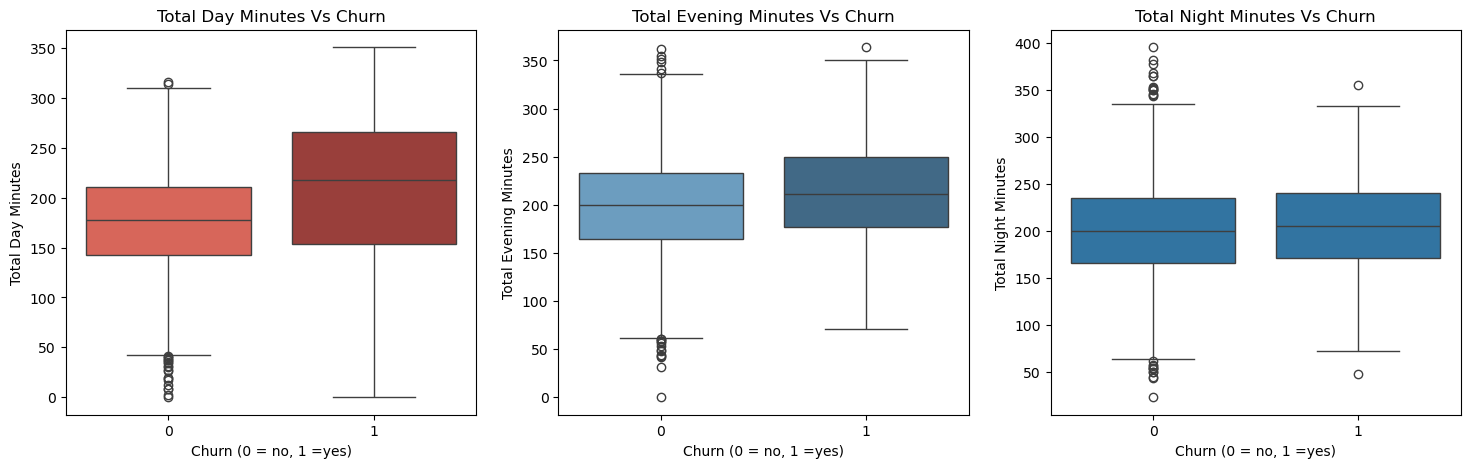

In [28]:
plt.figure(figsize=(18,5))
#Total day minutes vs churn boxplot
plt.subplot(1,3,1)
sns.boxplot(x=df_syria['churn'], y=df_syria['total day minutes'], palette="Reds_d")
plt.title('Total Day Minutes Vs Churn')
plt.xlabel('Churn (0 = no, 1 =yes)')
plt.ylabel('Total Day Minutes')

#Total evening minutes vs churn boxplot
plt.subplot(1,3,2)
sns.boxplot(x=df_syria['churn'], y=df_syria['total eve minutes'], palette="Blues_d")
plt.title('Total Evening Minutes Vs Churn')
plt.xlabel('Churn (0 = no, 1 =yes)')
plt.ylabel('Total Evening Minutes')

#Total night minutes vs churn boxplot
plt.subplot(1,3,3)
sns.boxplot(x=df_syria['churn'], y=df_syria['total night minutes'])
plt.title('Total Night Minutes Vs Churn')
plt.xlabel('Churn (0 = no, 1 =yes)')
plt.ylabel('Total Night Minutes')

plt.show()

From the above box plots, day minutes have the strongest association with churn as individuals tend to have higher usage. Evening and night Minutes do not show significant differences for churn implying they may not be strong predictors. Plot a scatter diagram of Total day minutes, Total evening minutes and total night minutes vs churn to analyze the relationship between total day minutes, total evening minutes and total night minutes.

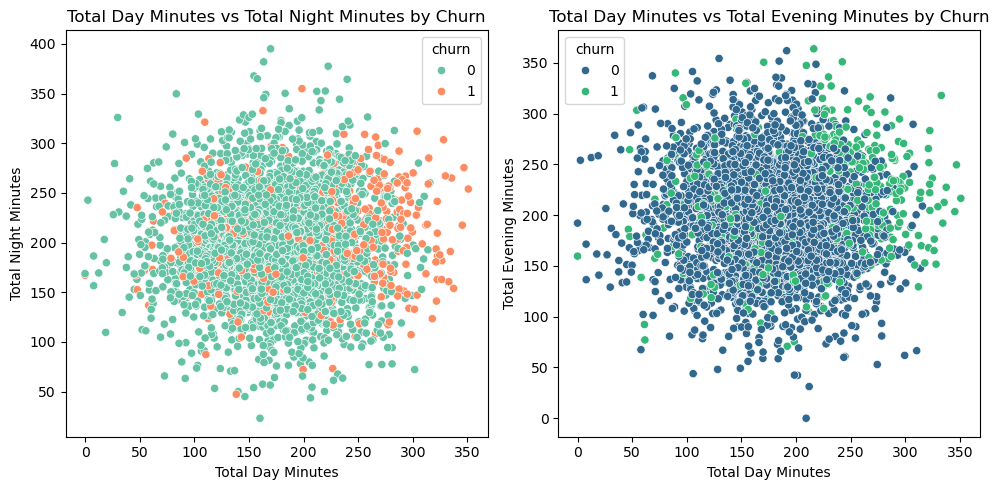

In [29]:
# Scatter plot for total day minutes vs Total Night Minutes by Churn
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

sns.scatterplot(x=df_syria['total day minutes'], 
                y=df_syria['total night minutes'], 
                hue=df_syria['churn'], 
                palette='Set2', ax=axes[0]) 
axes[0].set_title('Total Day Minutes vs Total Night Minutes by Churn')
axes[0].set_xlabel('Total Day Minutes')
axes[0].set_ylabel('Total Night Minutes')

# Scatter plot for total day minutes vs total evening minutes by Churn
sns.scatterplot(x=df_syria['total day minutes'], 
                y=df_syria['total eve minutes'], 
                hue=df_syria['churn'], 
                palette='viridis', ax=axes[1])  
axes[1].set_title('Total Day Minutes vs Total Evening Minutes by Churn')
axes[1].set_xlabel('Total Day Minutes')
axes[1].set_ylabel('Total Evening Minutes')
plt.tight_layout()
plt.show()

Both scatter plots show distinctively that customers have higher total day minutes, but the overlap in the data suggests that these features alone may not be sufficient to predict churn accurately. A decison tree model will be incorporated to illustrate the predictive relationship between total day minutes, total evening minutes, total night minutes and churn.

To begin with configure the DecisionTreeClassifier with hyperparameters to reduce overfitting

In [30]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=5, ccp_alpha=0.01)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       min_samples_leaf=5, min_samples_split=10)

In [31]:
#import relevant modules
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



# Define X(features) and y(target)
X = df_syria[['total day minutes', 'total eve minutes', 'total night minutes']] 
y = df_syria['churn'].astype(str)
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [32]:
#Create the Decision Tree classifier with hyperparameters to avoid overfitting
clf = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5, 
                             min_samples_leaf=5, min_samples_split=10)


In [33]:
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)


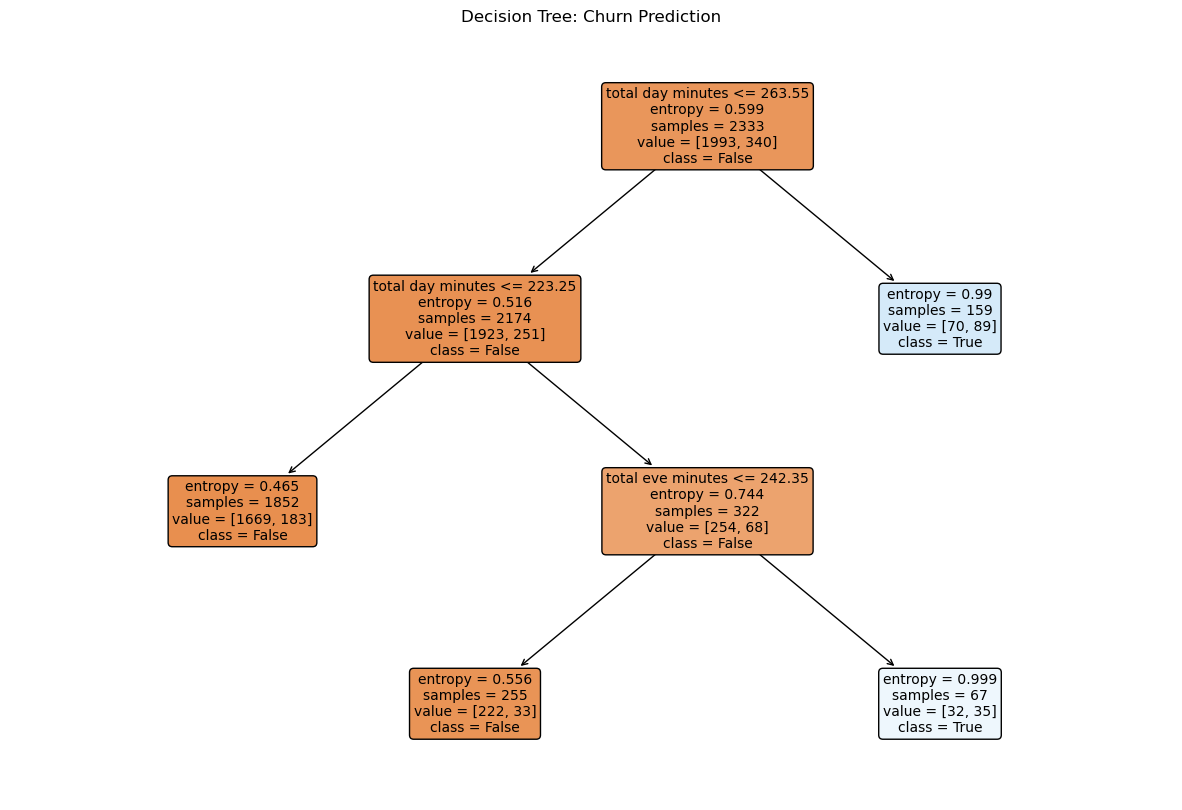

In [34]:
#visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, 
          feature_names=X.columns.tolist(), 
          class_names=['False', 'True'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree: Churn Prediction")
plt.show()

#### Evaluate the Model Evaluation using confusion matrix

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[821,  36],
       [ 80,  63]], dtype=int64)

From the above analysis:

* True Negatives(TN) are 821.These customers who did not churn, and the model correctly predicted them as false.
* False Positives(FP) are 36.These customers who did not churn, but the model incorrectly predicted them as true.
* False Negatives(FN) 80. These customers who churned, but the model incorrectly predicted them as false.
* True Positives(TP) 63. These customers who churned, and the model correctly predicted them as true.

#### Determine the accuracy of the model


In [36]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.884

The logistic regression model predicted approximately 88.4%  correctly of the test set labels.

#### Determine the model's precision

In [37]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

In [38]:
precision = precision_score(y_test, y_pred, pos_label=1)
precision

0.6363636363636364

For each positive prediction the model made, about 63.64% were actually correct positive cases.

#### Determine how many true churn cases were successfully detected by the model using the recall function.

In [39]:
recall = recall_score(y_test, y_pred, pos_label=1)
recall

0.4405594405594406

The model only predicted about 44.05% of correctly as churn

#### Model improvement through hyperparameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy'), 
                           param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_params

{'ccp_alpha': 0.0,
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 20}

#### Evaluation of improved model using confusion matrix,accuracy precision and recall function

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"confusion matrix is : {cm}")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is:{accuracy}")
precision = precision_score(y_test, y_pred, pos_label=1)
print(f"Precision is: {precision}")
recall = recall_score(y_test, y_pred, pos_label=1)
print(f"Recall is : {recall}")

confusion matrix is : [[821  36]
 [ 80  63]]
Accuracy is:0.884
Precision is: 0.6363636363636364
Recall is : 0.4405594405594406


#### Comparison between the baseline model(Logistic Regression) with Tuned Decision tree model

From the analysis of the tuned decision tree and the baseline model(Logistic Regression) there is an improvemnt in the recall value of 44.05% from 18.88% which clearly indicated that the model predicted about 44.05% of correctly as churn which could be acceptable for churn prediction.

#### Multivariate Model
This refers to a model with multiple input features (predictors) to make predictions on the target.This model of consideration will analyze the relationship  between features such as total charges for international, day evening and night calls, international plan, voice mail plan  to predict the target variable customer churn.
The model for consideration in this case is Random Forest classification model.

In [53]:
X = df_syria[['total intl charge', 'total day charge', 'total eve charge', 'total night charge', 'international plan', 'voice mail plan']]
y = df_syria['churn']

In [57]:
#ohe international plan and voice mail plan(categorical variables)
X = pd.get_dummies(X, columns=['international plan_1', 'voice mail plan_1'], drop_first=True)


In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
#check the shapes of train and test 
X_train.shape, X_test.shape

((2333, 6), (1000, 6))

In [64]:
#inititate random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state = 42)

#fit the model with the training sets
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [84]:
#Get feature importances
feat_importance = rf.feature_importances_

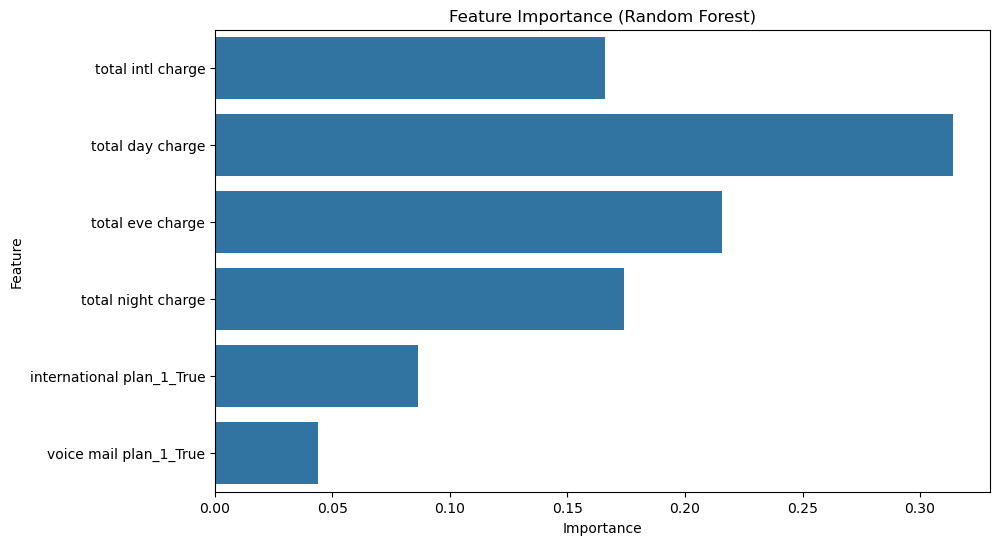

In [85]:
# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance, y=X.columns, orient='h')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### Model evaluation

In [67]:
#predictions on the test set
y_pred = rf.predict(X_test)


In [68]:
# Confusion Matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy is:{accuracy}")
precision = precision_score(y_test, y_pred, pos_label=1)
print(f"Precision is: {precision}")
recall = recall_score(y_test, y_pred, pos_label=1)
print(f"Recall is : {recall}")

Accuracy is:0.906
Precision is: 0.8266666666666667
Recall is : 0.43356643356643354


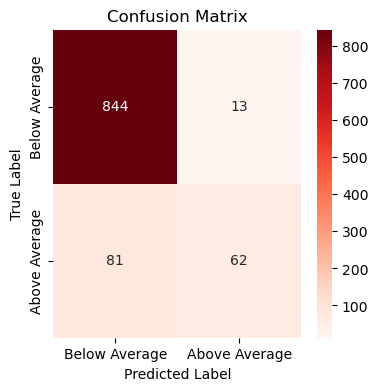

In [72]:
# plot a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',xticklabels=["Below Average", "Above Average"], yticklabels=["Below Average", "Above Average"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#### Comparison of Logistic regression model, decision tree model and random forest model side by side 

In [74]:
#initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [77]:
#Initialize empty dictionary
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": []
     
}


In [80]:
# Train each model, make predictions, and evaluate the performance
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    # Store the results
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

results_df

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.866,0.745778,0.575165
1,Decision Tree,0.816,0.653227,0.691647
2,Random Forest,0.908,0.876757,0.713279


### RECOMMENDATION
* From the above analysis of Logistic Regression model,Decision Tree Model and Random Forest Model, Random Forest having the  highest accuracy  of90.8% and strong precision 87.67%  along with a good recall of 71.3% it should be selected as the most appropriate model for predicting churn. 
It provides the best balance between detecting churn and minimizing false positives.
* Logistic Regression model having a high accuracy 86.%6 and a relatively good precision, its recall of 57.5 is low. This suggests the model misses a goog portion of the churn cases hence not giving a true record.

### CONCLUSION 
From the analysis and model evaluatiion, Random Forest Model had the best predictions being multivariate and incluiding the key metrics of prediction. 


### NEXT STEPS
Integration of the Random Forest model into a customer relationship management system for real-time churn prediction for the different customer bases.